<div class="alert alert-block alert-success">
    
## Data Science Libraries Quiz

### Instructions


1. Write code which will produce the specified result  
2. Enter that result in the green response cell when prompted
3. Write code comment(s) to describe the code


#### Note:

- Complete the work without the help of others
- Enter one code 
comment on Question 0 for 1 point 
- There are 9 questions, each worth 11 points
    - 10 points for code and answers
    - 1 point for at least one code comment on each question
- You can receive partial credit for your code





<div class="alert alert-block alert-info">

### Question 0 

- Run the following two cells
- Enter one code comment

In [2]:
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import necessary tools, going to add numpy 

In [3]:
df = data('tips')
# put tips data as dataframe (df)

---

<div class="alert alert-block alert-info">
  
## Question 1
        
a) What is the highest total_bill?
    
b) What time of day did this total_bill occur? 

In [4]:
df.head()
# pulled head to see table

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.describe()
# pulled describe for summary statistics

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df['total_bill'].max()
#find max total bill in df


50.81

In [7]:
df[df['total_bill'] == df['total_bill'].max()]['time'].values[0]
# find max total bill specify 0 position in time column and apply back to df

'Dinner'

<div class="alert alert-block alert-success">

### Question 1 Response
    
a) print(f"The highest total bill is {df['total_bill'].max()}")
    
b) print(f'Dinner')


---

<div class="alert alert-block alert-info">
  
## Question 2
    
a) What values are in the smoker column?
    
b) Are the majority of tables smoking or non-smoking?

In [8]:
df['smoker'].unique()
# find unique values in smokers which also returns dtype

array(['No', 'Yes'], dtype=object)

In [9]:
df['smoker'].value_counts()
# use value_counts to display summary of counts

smoker
No     151
Yes     93
Name: count, dtype: int64

<div class="alert alert-block alert-success">

### Question 2 Response
    
a) print(f'Smokers data is object type with No or Yes')

b) print(f'The majority of tables are non-smoking')
    

---

<div class="alert alert-block alert-info">
  
## Question 3 
    
- What proportion of the bills are from the weekend (Saturday and/or Sunday)? 
    - Assume each table has one bill, regardless of table size
- Round your answer to two decimal points.

In [47]:
# use isin to look in day column and create a true false column labeled is_weekend
df['is_weekend'] = df['day'].isin(['Sat', 'Sun'])
# check
# df['is_weekend']

# # Calculate the proportion of bills from the weekend
round(df.is_weekend.value_counts(normalize=True).max(), 2)





0.67

<div class="alert alert-block alert-success">

### Question 3 Response
    
- $20.89



---
<div class="alert alert-block alert-info">
    
## Question 4

    
-  Create a column named `percent_tip`.


- Calculate the percent_tip based on the formula below. 



> $\texttt{Percent tip} = \dfrac{\texttt{tip amount}}{\texttt{bill}}$

- What was the highest percent tip?

In [11]:
# pull head to see table again
df.head()

,total_bill,tip,sex,smoker,day,time,size,is_weekend
1,16.99,1.01,Female,No,Sun,Dinner,2,True
2,10.34,1.66,Male,No,Sun,Dinner,3,True
3,21.01,3.50,Male,No,Sun,Dinner,3,True
4,23.68,3.31,Male,No,Sun,Dinner,2,True
5,24.59,3.61,Female,No,Sun,Dinner,4,True


In [12]:
# create column based on tip formula and round it
df['percent_tip'] = round((df['tip'] / df['total_bill']) * 100,2)
# check head to make sure it looks good
df.head()

,total_bill,tip,sex,smoker,day,time,size,is_weekend,percent_tip
1,16.99,1.01,Female,No,Sun,Dinner,2,True,5.94
2,10.34,1.66,Male,No,Sun,Dinner,3,True,16.05
3,21.01,3.50,Male,No,Sun,Dinner,3,True,16.66
4,23.68,3.31,Male,No,Sun,Dinner,2,True,13.98
5,24.59,3.61,Female,No,Sun,Dinner,4,True,14.68


In [22]:
# look at percent tip max
df['percent_tip'].max()

71.03

<div class="alert alert-block alert-success">

### Question 4 Response
    
- 71.03%
    

---

<div class="alert alert-block alert-info">
    
## Question 5

    
a) Which time of day has a higher average total_bill, dinner or lunch?
    
b) What is the difference in the average bill?


In [14]:
# going to use groupby to find what time of day has the highest average bill

df.groupby('time')['total_bill'].mean().sort_values(ascending=False).round(2)

time
Dinner    20.80
Lunch     17.17
Name: total_bill, dtype: float64

In [15]:
# throw previous query into a variable and minus one from the other

highest_avg_bill_by_time =df.groupby('time')['total_bill'].mean().sort_values(ascending=False).round(2)
round(highest_avg_bill_by_time['Dinner']-highest_avg_bill_by_time['Lunch'],2)

3.63

<div class="alert alert-block alert-success">

### Question 5 Response
    
a) Dinner has the highest avg bill

b) Delta in avg bills is $3.63

---
<div class="alert alert-block alert-info">
    
## Question 6
    

- Rename the column named `size` to `table_size`
- Verify this column name replaces the former column name 
- Use your new column name to determine:
    - What is the most common table size?


In [16]:
# pull head again to have visual
df.head()

,total_bill,tip,sex,smoker,day,time,size,is_weekend,percent_tip
1,16.99,1.01,Female,No,Sun,Dinner,2,True,5.94
2,10.34,1.66,Male,No,Sun,Dinner,3,True,16.05
3,21.01,3.50,Male,No,Sun,Dinner,3,True,16.66
4,23.68,3.31,Male,No,Sun,Dinner,2,True,13.98
5,24.59,3.61,Female,No,Sun,Dinner,4,True,14.68


In [17]:
# use rename
df.rename(columns={'size': 'table_size'}, inplace=True)




In [18]:
# verify
df.head()

,total_bill,tip,sex,smoker,day,time,table_size,is_weekend,percent_tip
1,16.99,1.01,Female,No,Sun,Dinner,2,True,5.94
2,10.34,1.66,Male,No,Sun,Dinner,3,True,16.05
3,21.01,3.50,Male,No,Sun,Dinner,3,True,16.66
4,23.68,3.31,Male,No,Sun,Dinner,2,True,13.98
5,24.59,3.61,Female,No,Sun,Dinner,4,True,14.68


In [44]:
# good ol' value counts
df['table_size'].value_counts().idxmax()

2

<div class="alert alert-block alert-success">

### Question 6 Response
    
- 2 is the most common table size
    

---
<div class="alert alert-block alert-info">
    
## Question 7

- The following code produces errors.
    
- Correct the code to determine:
    - What is the **maximum total_bill** for dinner time on Thursday?
    

#### Incorrect code
```python
df.total_bill( (df.day == 'Thursday') and (df.time == 'dinner') ) 
```

In [45]:
df['total_bill'].max()
df.day.unique()
df.time.unique()



array(['Dinner', 'Lunch'], dtype=object)

In [48]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [49]:
df.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [51]:
df.total_bill[(df.day == 'Thur') & (df.time == 'Dinner')]

244    18.78
Name: total_bill, dtype: float64

In [30]:
df.groupby(['day','time'])[['total_bill']].max()

total_bill
day  time              
Fri  Dinner       40.17
     Lunch        16.27
Sat  Dinner       50.81
Sun  Dinner       48.17
Thur Dinner       18.78
     Lunch        43.11

1      False
2      False
3      False
4      False
5      False
       ...  
240    False
241    False
242    False
243    False
244    False
Name: time, Length: 244, dtype: bool

<div class="alert alert-block alert-success">

### Question 7 Response

    
- $18.78
    
    

---
<div class="alert alert-block alert-info">
    
## Question 8


- What is the min, mean, and max total_bill?
- Use a **histogram** to plot the distribution of the total_bill
    - add a title
    

In [65]:
# summary statistics
df.describe()

,total_bill,tip,table_size,percent_tip
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.079754
std,8.902412,1.383638,0.951100,6.107020
min,3.070000,1.000000,1.000000,3.560000
25%,13.347500,2.000000,2.000000,12.910000
50%,17.795000,2.900000,2.000000,15.475000
75%,24.127500,3.562500,3.000000,19.147500
max,50.810000,10.000000,6.000000,71.030000


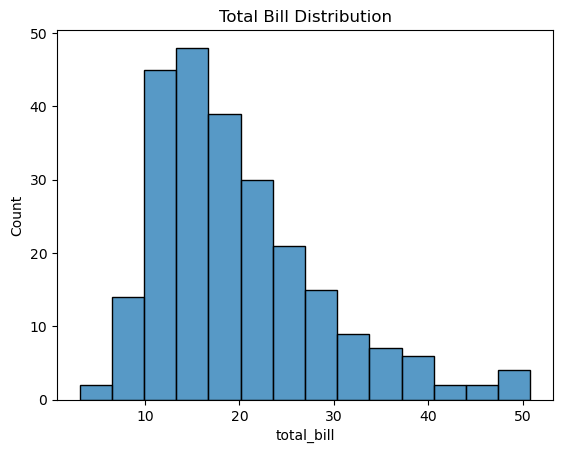

In [68]:
# import seaborn for histogram function
import seaborn as sns
sns.histplot(data=df, x='total_bill')
plt.title('Total Bill Distribution')
plt.show()

<div class="alert alert-block alert-success">

### Question 8 Response

    
- Total bill stats: Min = 3.07, Max = 50.81, Mean = 19.79
  Histogram above
    
    

---
<div class="alert alert-block alert-info">
    
## Question 9

- Use matplotlib or seaborn to create a **scatter plot** for total_bill versus tips
    - Plot total_bill along the x-axis

- Customize the visualization in at least one way
- Add axis labels and a title

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


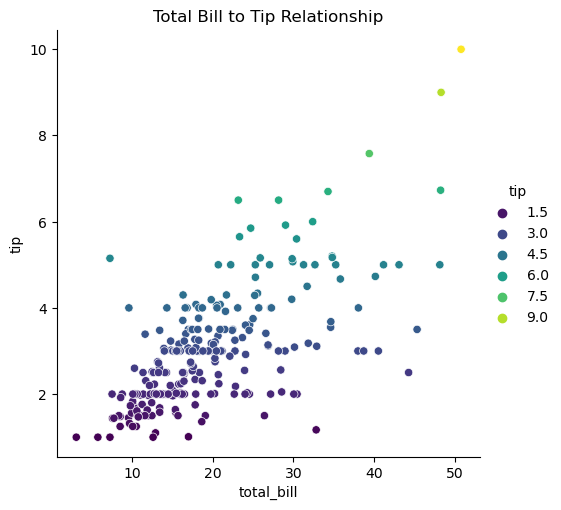

In [74]:
# relational tool to show relationship customized by showing hue of tip
sns.relplot(x='total_bill', y='tip', hue='tip', data=df, palette='viridis')
plt.title('Total Bill to Tip Relationship')
plt.show();